                      **University Of London**

      HR Analytics: Job Change of Data Scientists Project Proposal

                          January 3,2022

A company which is very active in Data Science and Big Data field wants to hire data scientists so the HR is doing its own research to predict which candidate will move to a new job in order to reduce recruitment costs.

**Project Proposal**

**1 Aims, objectives and background**

**1.1 Introduction**

Data Science is a prominent field today which most companies depend on today. Non tech companies who missed on the start of data science are now cacthing up due to its imporatance. They are seeking for data scientists/data engineers who are aware of data science tools to help the company in extracting interesting insights, analytics, predictions of their losses and revenues .... etc.

The content of this project is, firstly, to explore some data provided by the HR team. It is asked to explore which data science candidates are more prone to change their current role. This is needed in order to reduce searching time for the HR and target employees who are willing to join. It is our role to search for the factors that may affect employees on whether they want to change their role or not using explanatory data analysis, building some hypothesis, and predicting the probability of movement for the employee using machine learning techniques.

The approach we have taken in this project is to use descriptive statistics visually and numerically to state facts and build a new point of view on the job market today. We would use means, medians, standard deviations, mode, boxplots and heatmaps to state the facts and numbers we have. We also propose in phase two to build some hypothesis testing to understand differences in educational groups and cities, we also push it a step further and build a probabilistic predictive model in order to predcit which employee would move with what probability. This is needed for the HR team to take data driven decisions.


**1.2 Aims and objectives**

Within this project, I would like to explore which features play a role in the decision of moving from a company for an employee. First of all, it is of great intrest to me to explore how gender plays a role in the data science job market. Also, I would like to test the hypothesis if the development of a city would play a role in changing job roles. Moreover, what are the educational backgrounds of data scientists and what degree is achieved in their study. It is of course natural to extend the previous hypothesis and test if education plays a role in moving from a job. I also would like to view the correlation between variables and the target variable. I find this project a good demonstration for data preprocessing and extracting data from an SQLITE database. 

  My aim is to build hypothesis using various hypothesis testing methods such as pairwise t-testing and ANOVA to understand which factors affect the decision of moving. To add to the last aim, I would build a predictive model and compare multiple models against each other in order to understand which type of modeling would fit the data at hand and finally predict if the candidates are willing to move from their company or not in phase two of the project. 

**1.3 Data**

**1.3.1  Dataset**

The dataset is obtained from [Kaggle][kgl] website which is compiled by [Möbius][mbs]. The dataset is a compilation of HR data which are collected by a company that offers data science specific courses. Each observation is an entry for a person enrolled in the data science course provided in the company. The company has collected many features such as *education_level*, *city_development_index, major_discipline* and others. The dataset has enrolled persons from 123 different *cities* which are indicated by city_(number), moreover each *city* (Char) has a *city_development_index* (Float)which indicates on how much the *city* is developed ranging from 0 the lowest value till 1 the highest value. 

[kgl]: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

[mbs]: https://www.kaggle.com/arashnic

Three *genders* (Char) with 13221 Males, 1238 Females, 191 Others. The dataset has the *enrolled_university* (Char) feature which contains whether the person is currently enrolled in a full time course, part time course or is not enrolled at all in a university. The data also contains the *enrollee_id* (int) which indicates the unique id for each person, the person's *education_level* (Char) whether the person hold a university degree such as Phd, Masters and Graduate (Bachelors) or whether the person hold a high school degree or just a primary school degree.
Each university degree holder has a value indicating the *major_discipline* (Char) he/she/they studied. Primary school and highschool degree people have No Major indicated infront of them. 

Data about the company the person works for is also available such as the *company_type* (Char) which has the values early stage startup, funded startup, NGO, public sector, Pvt Ltd (Private Limited) and Other. Also the *company_size* is noted which ranges from less than 10 till values 10000+ (Char). We have also how many times did the person change jobs , *last_new_job*, with values ranging from 0 (never) to greater than four (Char). The years of experience is also noted which range from less than one year of *experience* to more than 20 years of experience (Char). Our last feature is the *training_hours* (Int) which indicates how many hours the person had spent at the company studying data science related courses. 

Our variable of intrest is the *target* (Boolean) column which contains values 1 & 0 which indicate if a person is willing to change his job or not respectivaley.




Also the dataset has 4508 missing values from the gender, 5938 missing values from company_size, 2813 missing values from major_discipline, 460 missing values from education_level, 423 missing values from last_new_job, 386 missing values from enrolled_university, 65 missing values from experience, 6140 missing values from company_type. We will drop the column company_size due to the many missing values which will affect our analysis. We also take into account that there are Nan values in major_dispiline infront of people with only high school and primary school by adding the term No_Major. We then neglect all missing values in our analysis in order to avoid miscalculations due to the value 'NA'.
 
The size of the data is 19158 records before preprocessing and 9607 records after data processing and cleaning.
        
                                      
 

In [3]:
import csv
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
!pip install session_info

     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8045 sha256=b6606e89e77b664c49f1eef55cbff34f6346a0017d2cc5b6e79ee6d792dda048
  Stored in directory: /root/.cache/pip/wheels/bd/ad/14/6a42359351a18337a8683854cfbba99dd782271f2d1767f87f
Successfully built session-info


In [4]:
import session_info
session_info.show()

In [ ]:
dataframe=pd.read_csv('/content/aug_train.csv')
dataframe.columns=dataframe.columns.str.strip()
dataframe.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [ ]:
def data_count(dataframe):
    print("DATA Counts")
    print('='*80)
    print("Gender : ",dataframe['gender'].value_counts())
    print('='*80)
    print("relevent_experience : ",dataframe['relevent_experience'].value_counts())
    print('='*80)
    print("enrolled_university : ",dataframe['enrolled_university'].value_counts())
    print('='*80)
    print("education_level : ",dataframe['education_level'].value_counts())
    print('='*80)
    print("major_discipline : ",dataframe['major_discipline'].value_counts())
    print('='*80)
    print("company_size : ",dataframe['company_size'].value_counts())
    print('='*80)
    print("company_type : ",dataframe['company_type'].value_counts())
    print('='*80)
    print("cities : ",len(dataframe['city'].unique()))
    print('='*80)
    

data_count(dataframe)


DATA Counts
Gender :  Male      13221
Female     1238
Other       191
Name: gender, dtype: int64
relevent_experience :  Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64
enrolled_university :  no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
education_level :  Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64
major_discipline :  STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64
company_size :  50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64
company_type :  Pvt Ltd                9817
Funded Startup


**1.4 Limitations and constraints of the data**

The dataset is imbalanced since the number of males is more than the females and other. This will have a direct effect on our choice of hypothesis test. The data also contains alot of missing data thus we lose alot of observations when dropping them which affects our analysis. We also cannot infer the city names due to privacy of the data thus we only have city keys. Moreover most variables are categorical and not continous with high cardinality like the *city* column. The data is also highly biased towards males thus it may give biased insights based on *gender*. Also we try to simulate the data as if it is already found in the companies database and we try to read it and gain insights from it.
          

**1.5 Ethical considerations**

The data has taken into consideration some ethical consideration which are clear in the columns *enrolled_id* and *city*. The data only has the *enrolled_id* which we could not derive from any crucial data about the person's sensitive data such as the name, salary, martial status, age, etc. Also the *city* has no meaningful name in order to avoid any biases that could be generated to the HR team by blacklisting any cities in specific or focusing on a certain city and neglecting the other. This helps in having a diverse emplyoment strategy. Also the data tries to inclue all types of university and non university degrees starting from people who hold primary school to people who have phds. Lastly, The study is not only focused on STEM graduates and had included people from a diverse array of major disiplines in the belief of inclusion of people who may self study data science materials.

In [ ]:
try:
  conn=sqlite3.connect("/content/hrDataScienceDB")
  dataframe.to_sql("hr_train",conn)
except:
  print('Table is already exisiting')

Table is already exisiting


In [ ]:
# read from the table saved in the sqlite 
dataframe = pd.read_sql_query("select * from hr_train", conn)
dataframe
conn.close()


# 2.1 Data Preprocessing

In this section we focus on preparing the data into a meaningful and useful dataset which could be further used in phase two to build the probabilistic model and also could be used in further work. We start by cleaning the data of any typos or missing data that could be infered. Then after the cleaning process we drop all data with NA values that could not be filled in order to avoid any problems that could arise during our analysis.

Here we start off by adding the **No Major** value in major_discipline column for people with an education level of High School and Primary School

In [ ]:
dataframe['major_discipline']=np.where(dataframe['education_level']=='High School','No Major',dataframe['major_discipline'])
dataframe['major_discipline']

dataframe['major_discipline']=np.where(dataframe['education_level']=='Primary School','No Major',dataframe['major_discipline'])
dataframe['major_discipline']

0                   STEM
1                   STEM
2                   STEM
3        Business Degree
4                   STEM
              ...       
19153         Humanities
19154               STEM
19155               STEM
19156           No Major
19157           No Major
Name: major_discipline, Length: 19158, dtype: object

Here there is a misleading entry in the company_size "10/49" so we replaced with "10-49" to describe the range of the employees working in a company instead of dropping this category.

In [ ]:
dataframe.company_size[dataframe.company_size=='10/49']='10-49'
print(pd.unique(dataframe['company_size']))
# display(dataframe.loc[dataframe['company_size']=='10-49'])

[None '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10-49' '100-500'
 '500-999']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In the below cell, instead of dropping the category '>4' we replaced by 5 and the category 'never' by the value zero which will help as well in the logistic regression. We also replace the years of experience less than 1 year by the value zero years and years of experience greater than 20 by 21 years instead of dropping these 2 categories. We follow this methodolgy in order to not lose data which could be deemed helpful when training the model at the end of our data processing pipeline.

In [ ]:
dataframe.last_new_job[dataframe.last_new_job=='>4']='5'
dataframe.last_new_job[dataframe.last_new_job=='never']='0'
dataframe.experience[dataframe.experience=='<1']='0'
dataframe.experience[dataframe.experience=='>20']='21'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

Then we proceed by showing the null values in each column in our dataframe

In [ ]:
dataframe[dataframe.isnull().any(axis=1)]

,index,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,None,None,1,36,1.0
2,2,11561,city_21,0.624,None,No relevent experience,Full time course,Graduate,STEM,5,None,None,0,83,0.0
3,3,33241,city_115,0.789,None,No relevent experience,None,Graduate,Business Degree,0,None,Pvt Ltd,0,52,1.0
5,5,21651,city_176,0.764,None,Has relevent experience,Part time course,Graduate,STEM,11,None,None,1,24,1.0
9,9,699,city_103,0.920,None,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,5,123,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19148,19148,9212,city_21,0.624,None,Has relevent experience,no_enrollment,Masters,STEM,3,100-500,Pvt Ltd,3,40,1.0
19151,19151,11385,city_149,0.689,Male,No relevent experience,Full time course,Graduate,None,2,None,None,1,60,0.0
19153,19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,None,None,1,42,1.0
19154,19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,None,None,4,52,1.0


Here we removed any rows with NA values per column after processing the dataset then we reset the index in order to let the dataset follow same sequence, thus the counts differ in each column and it's strongly remarked in the city column (117 cities instead of 123 cities). However the data is still imbalanced

In [ ]:
dataframe=dataframe.dropna(how='any',axis=0)
dataframe.reset_index()
data_count(dataframe)

DATA Counts
Gender :  Male      8690
Female     823
Other       94
Name: gender, dtype: int64
relevent_experience :  Has relevent experience    8311
No relevent experience     1296
Name: relevent_experience, dtype: int64
enrolled_university :  no_enrollment       7994
Full time course    1007
Part time course     606
Name: enrolled_university, dtype: int64
education_level :  Graduate          6252
Masters           2449
High School        610
Phd                254
Primary School      42
Name: education_level, dtype: int64
major_discipline :  STEM               7989
No Major            764
Humanities          378
Other               177
Business Degree     170
Arts                129
Name: major_discipline, dtype: int64
company_size :  50-99        2142
100-500      1934
10000+       1517
10-49        1040
1000-4999     993
<10           940
500-999       623
5000-9999     418
Name: company_size, dtype: int64
company_type :  Pvt Ltd                7289
Funded Startup          831
Publi

#3.1 Key finidngs from Descriptive Analysis
In this section we will be giving an introduction to the statistical methods used to analyze
the dataset. This report focuses on statistical descriptive analysis so most statistical
methods are based on simple numerical statistical methods such as mean, median ,variance
,etc, and simple visualization techniques such as boxplots, scatter plots, etc.

Firstly, we focus on drawing insights from the data by  printing some descriptive statistics such as the mean, std, 25% quantile, 50% quantile (median), 75% quantile and the min and max values in our data. We proceed to apply the above function on all continous data we have in the dataset after the data processing phase. We then compute the mode for the categorical data in order to understand which categories are the most prevelant per categorical data. We also get the cardianlity in order to understand if our data has a high cardinality in some ceratin columns or not. Afterwards we proceed to calculate the pearson's coefficent of correlation fucntion for our continous data in order to see if there are correlations between the variables or not as an initial step to understand what impacts the target variable and which features do not.

In [ ]:
print("city_development_index: ",dataframe['city_development_index'].describe())
print('='*50)
dataframe['experience']=pd.to_numeric(dataframe['experience'])
print("experience: ",dataframe['experience'].describe())
print('='*50)
print("training_hours: ",dataframe['training_hours'].describe())
print('='*50)
dataframe['last_new_job']=pd.to_numeric(dataframe['last_new_job'])
print("last_new_job: ",dataframe['last_new_job'].describe())
print('='*50)
print("target: ",dataframe['target'].describe())

city_development_index:  count    9607.000000
mean        0.846852
std         0.114294
min         0.448000
25%         0.802000
50%         0.910000
75%         0.920000
max         0.949000
Name: city_development_index, dtype: float64
experience:  count    9607.000000
mean       11.456958
std         6.561469
min         0.000000
25%         6.000000
50%        10.000000
75%        18.000000
max        21.000000
Name: experience, dtype: float64
training_hours:  count    9607.000000
mean       65.187780
std        60.040523
min         1.000000
25%        23.000000
50%        47.000000
75%        88.000000
max       336.000000
Name: training_hours, dtype: float64
last_new_job:  count    9607.000000
mean        2.327365
std         1.665670
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: last_new_job, dtype: float64
target:  count    9607.000000
mean        0.161653
std         0.368151
min         0.000000
25%         0.0

As we can see in the above results, regarding the continous data, the min of city_development_index is 0.448000 and the max is 0.949000 and the median is 0.910000, however the difference between the min and the max is not too large and the data is skewed to the left. The standard deviation of city_development_index is 0.114294 which is very low so the data is concentrated near the median. This means that most of the cities have high city_development_index which means the cities are similar.

On the other hand the training_hours has wide range of values as we can see its min and max values are 1 and 360 respectively, the median is 47. 
Since the 75% quartile is less than half the max which means that most of the data is right skewed.

These numbers will be visualised using histograms to be more understanble in the next section.

In [ ]:
print(data_count(dataframe))

print('Gender Mode: '+dataframe['gender'].mode().iat[0])
print('relevent_experience Mode: '+dataframe['relevent_experience'].mode().iat[0])
print('enrolled_university Mode: '+dataframe['enrolled_university'].mode().iat[0])
print('education_level Mode: '+dataframe['education_level'].mode().iat[0])
print('major_discipline Mode: '+dataframe['major_discipline'].mode().iat[0])
print('company_size Mode: '+dataframe['company_size'].mode().iat[0])
print('company_type Mode: '+dataframe['company_type'].mode().iat[0])
print('city Mode: '+dataframe['city'].mode().iat[0])
print('Target Mode: '+str(dataframe['target'].mode().iat[0]))

DATA Counts
Gender :  Male      8690
Female     823
Other       94
Name: gender, dtype: int64
relevent_experience :  Has relevent experience    8311
No relevent experience     1296
Name: relevent_experience, dtype: int64
enrolled_university :  no_enrollment       7994
Full time course    1007
Part time course     606
Name: enrolled_university, dtype: int64
education_level :  Graduate          6252
Masters           2449
High School        610
Phd                254
Primary School      42
Name: education_level, dtype: int64
major_discipline :  STEM               7989
No Major            764
Humanities          378
Other               177
Business Degree     170
Arts                129
Name: major_discipline, dtype: int64
company_size :  50-99        2142
100-500      1934
10000+       1517
10-49        1040
1000-4999     993
<10           940
500-999       623
5000-9999     418
Name: company_size, dtype: int64
company_type :  Pvt Ltd                7289
Funded Startup          831
Publi

As we can see above that the most dominant gender in this dataset is the Male so most of our statistics will be biased and cannot get enough inisghts regarding the females. In addition, the most dominant major is STEM regardless the city and most of the working employees are graduates.

In [ ]:
dataframe[['city_development_index','experience','training_hours','target']].corr()

,city_development_index,experience,training_hours,target
city_development_index,1.000000,0.312613,-0.004653,-0.410591
experience,0.312613,1.000000,-0.003280,-0.186545
training_hours,-0.004653,-0.003280,1.000000,-0.012766
target,-0.410591,-0.186545,-0.012766,1.000000


The term correlation in the context of 2 continuous variables reveals how much is variable X changes with when variable Y changes which is a measure for linear dependency. Note that correlation does not always imply causation. So as we can see above that there is no strong positive correlation between the variables and it will be illustrated in the heatmap below.

# 3.2 Key Finidings from Data Visualization
In the data visualization section, we are intersting in visualising to illustrate more the relationships between the variables and we will discuss the findings with a visual prospective in order to
familiarize the reader with the actual distribution of the data. We used the heatmap to see how strongly correlated the continuous variables are against each other. We continue our exploration by plotting boxplots of the educational level against the experience seperated by gender. The plot is used to gain insights about if education has an effect on experience and if gender may affect in anyway the results or not. We may explore later using hypothesis testing oif these variables play a role in the differences of years of experience or not. Furthermore, histograms are plotted to see the distibution of both continous variables of interest training_hours and city_development_index.

We continue our exploration by seeing if the major_displine has an effect on the training hours needed especially if STEM majors require less training hours than other majors as Data Science is a STEM field.

We then plot the counts of the target variable, the target variable seperated by gender, education_level sepereated by the target variable, major_discipline sepereated by the target variable, and many more.

We started by the correlation between the continuous variables. The highest correlation is between the city_development_index and the target which is 0.41 however it's less than 0.5.
On the other hand the training_hours and the the city_development_index is not correlated as its valus is zero.

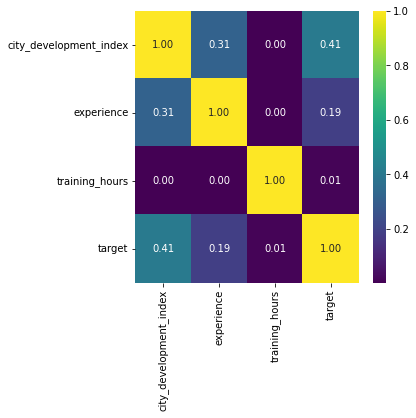

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(np.abs(dataframe[['city_development_index','experience','training_hours','target']].corr()), annot=True, cmap="viridis", fmt="0.2f");

The males and females that have PhD degree have the highest years of experience, above 20. In case of masters degree, the males have more experience rather than the females.

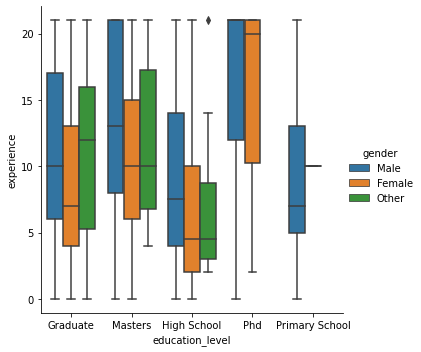

In [ ]:
sns.catplot(x="education_level", y="experience", hue="gender", kind="box", data=dataframe)

As explained above in the descriptive analysis section, that the data in the training_hours is right skewed. Most of the data is concentrated between 0 and 65 hours with median equals to 47.

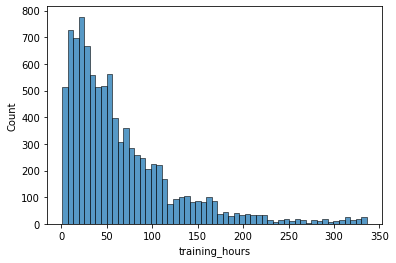

In [ ]:
sns.histplot(x="training_hours", data=dataframe)


Here the data in the city_development_index is left skewed with standard deviation near to zero (0.114294) since the data is concentrated near the median (0.910000) which emphasize the statistical numbers we have seen above.

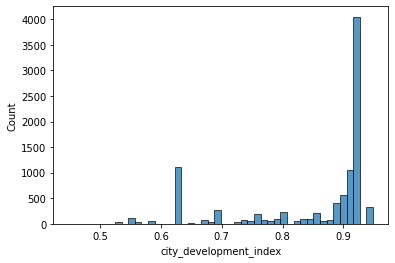

In [ ]:
sns.histplot(x="city_development_index", data=dataframe)


As we can see below that in most of the majors, the maximum number of training hours does not exceed 100 hours. No specific major has extra training hours

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

<Figure size 1080x576 with 0 Axes>

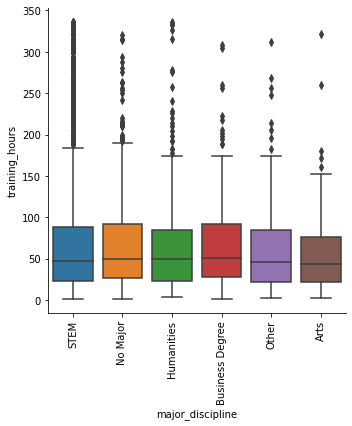

In [ ]:
plt.figure(figsize = (15,8))
ax=sns.catplot(x="major_discipline", y="training_hours", kind="box", data=dataframe)
plt.xticks(rotation=90)

The bar plot below shows most of the employess in this dataset prefer to stay in their current job.

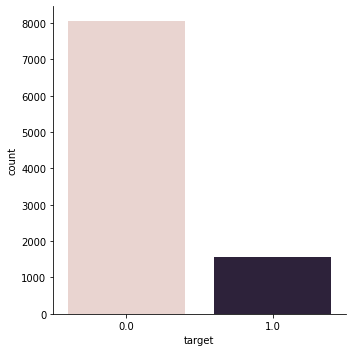

In [ ]:
sns.catplot(x="target", kind="count",palette="ch:.0", data=dataframe)
# dataframe.target.value_counts().tolist()

This bar plot is smilar to the above one. Since most of our dataset is males so the majority of the males and females as well prefer to stay in their current job.

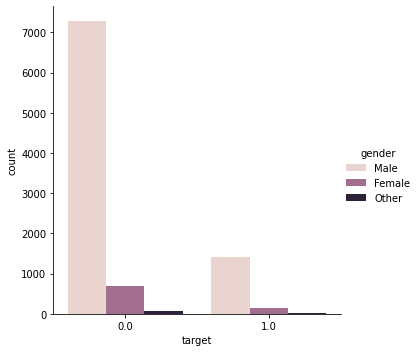

In [ ]:
sns.catplot(x="target", kind="count",palette="ch:.0",hue="gender", data=dataframe)


The below bar plot shows that most of the fresh graduates prefer to stay in their current job

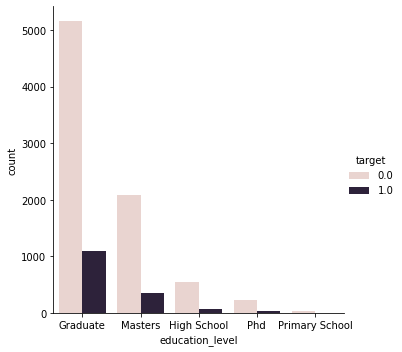

In [ ]:
sns.catplot(x="education_level", kind="count",palette="ch:.0", data=dataframe,hue="target")

Since the most dominant major is STEM so most of them prefer to stay in their current job

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

<Figure size 1080x576 with 0 Axes>

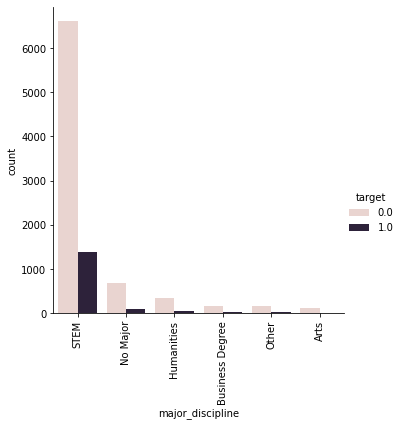

In [ ]:
plt.figure(figsize = (15,8))

ax = sns.catplot(x="major_discipline", kind="count",palette="ch:.0", data=dataframe,hue="target")
plt.xticks(rotation=90)

Here most of the employees change their job only one time then they stablize, followed by 5 times they change their jobs

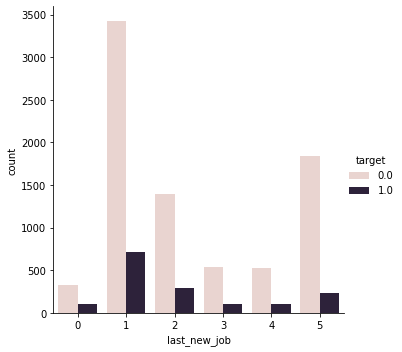

In [ ]:
order=[0,1,2,3,4,5]
order
sns.catplot(x="last_new_job",order=order, kind="count",palette="ch:.0", data=dataframe,hue="target")

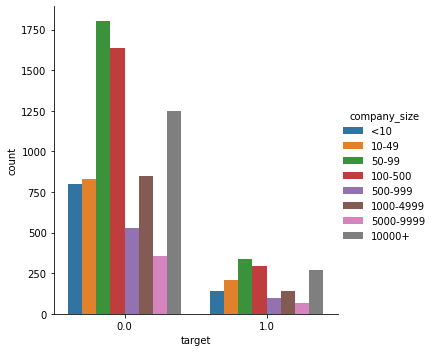

In [ ]:
order=['<10','10-49','50-99','100-500','500-999','1000-4999','5000-9999','10000+']
sns.catplot(x="target",hue="company_size",hue_order=order, kind="count", data=dataframe)

 However the graph doesn't seem to indicate anything other than that most people who have undertook the courses provided by the company work for companies with size 50-99 followed by 100-500. We can see that the same proportion of people who prefer to stay in their company based on the size are the same proportion of people who prefer to stay in the company based on its size. Then we mapped the categories in the company_size to be described in the form of levels which will help us while using the logistic regression in phase two.

---



In [ ]:
dataframe.company_size[dataframe.company_size=='<10']='0'
dataframe.company_size[dataframe.company_size=='10-49']='1'
dataframe.company_size[dataframe.company_size=='50-99']='2'
dataframe.company_size[dataframe.company_size=='100-500']='3'
dataframe.company_size[dataframe.company_size=='500-999']='4'
dataframe.company_size[dataframe.company_size=='1000-4999']='5'
dataframe.company_size[dataframe.company_size=='5000-9999']='6'
dataframe.company_size[dataframe.company_size=='10000+']='7'
dataframe.reset_index()
display(dataframe)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

,index,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,None,None,1,36,1.0
1,1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,2,Pvt Ltd,>4,47,0.0
2,2,11561,city_21,0.624,None,No relevent experience,Full time course,Graduate,STEM,5,None,None,never,83,0.0
3,3,33241,city_115,0.789,None,No relevent experience,None,Graduate,Business Degree,<1,None,Pvt Ltd,never,52,1.0
4,4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,2,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,None,None,1,42,1.0
19154,19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,None,None,4,52,1.0
19155,19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,2,Pvt Ltd,4,44,0.0
19156,19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,No Major,<1,4,Pvt Ltd,2,97,0.0


# 4. Discussion
After the analysis and key insights we have drewn from our work. We have found out that many features may impact a decision of a person to leave his job. For example, his education level, the city the person lives in, his major discipline etc. Our simple descriptive insights have given us some intuition about the data like for example its distribution. For example, most people attend courses with around 50 hours of training only however still its effect on the decision to leave a company or stay is still unclear. We also visually see that the training hours does not differ between people of different majors thus employee training is an important issue regardless of his educational background or major. Also it seems from the correlation matrix that the city development index and the target variable are correlated somehow which would need more in depth analysis using more sophisticated methods.

# 5. Conclusion

All in all, We have explored the HR dataset provided by the company in order to gain insights which would be helpful in our next phase. We have cleaned and sanitized our data by filling out what we could of missing data and dropping which could not be filled. We continue with our descriptive statistical analysis by using basic statistics such as the mean, median, mode. We extend our exploration by plotting histograms, boxplots, and barplots in order to get a clear and full picture on how the data behaves. We can continue into phase two with the data now in order to build the probabilistic predictive model in order to understand which factors affect people's decisions on moving from companies and changing their job roles.